In [2]:
import pandas as pd
import matplotlib.pyplot as plt

imput_file_path = "/Users/joesouber/OneDrive - University of Bristol/MSc Data Science/data science mini project/dsmp-2024-group-13/vdjdb_full.txt"
data = pd.read_csv(imput_file_path, sep='\t')
df = pd.DataFrame(data)

relevant_columns = [
    'cdr3.alpha', 'v.alpha', 'j.alpha', 'cdr3.beta', 'v.beta', 'd.beta', 'j.beta',
    'species', 'mhc.a', 'mhc.b', 'antigen.gene','antigen.epitope', 'vdjdb.score', 'mhc.class'
]
# For the purpose of this example, we won't filter out lower-quality scores to avoid data imbalance,
# but in practice, you may want to consider this based on the dataset's size and distribution.
filtered_data = df[relevant_columns]
# Displaying the first few rows of the filtered dataset to verify the selection
filtered_data
# Checking for missing values in crucial columns
missing_values = filtered_data.isnull().sum()

# Examining the number of unique values in categorical columns for potential encoding strategies
unique_values = filtered_data.nunique()

# Removing rows with missing cdr3 sequences
#df_cleaned = filtered_data.dropna(subset=['cdr3.alpha','cdr3.beta'])
#df_cleaned.reset_index(drop=True, inplace=True)

#missing_values_df_cleaned = df_cleaned.isnull().sum()
#report = {
    #"Missing Values": missing_values,
    #"Missing Values df_cleaned": missing_values_df_cleaned
#}

#report

/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_30652/3033546283.py:5: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(imput_file_path, sep='\t')


<AxesSubplot:title={'center':'Species Distribution'}>

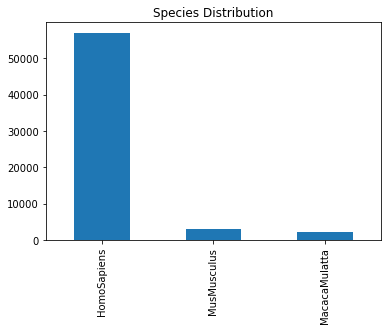

In [3]:
filtered_data['species'].value_counts().plot(kind='bar', title='Species Distribution')


<AxesSubplot:title={'center':'Species Distribution'}>

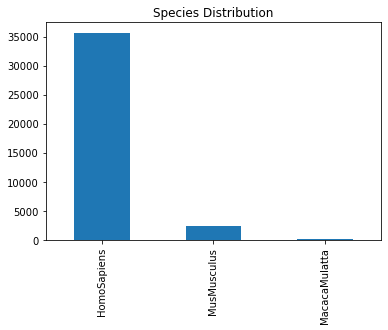

In [27]:
df_cleaned['species'].value_counts().plot(kind='bar', title='Species Distribution')

In [ ]:
# Assuming 'df' is your DataFrame that contains a 'species' column
species_counts = df_cleaned['species'].value_counts()

# This will print out the count of entries for each species in your DataFrame
print(species_counts)


what the two bar charts and the species count code is showing is that, when we filter to remove missing entries from cdr3 chains, the macacaMulatta species gets entirely removed.

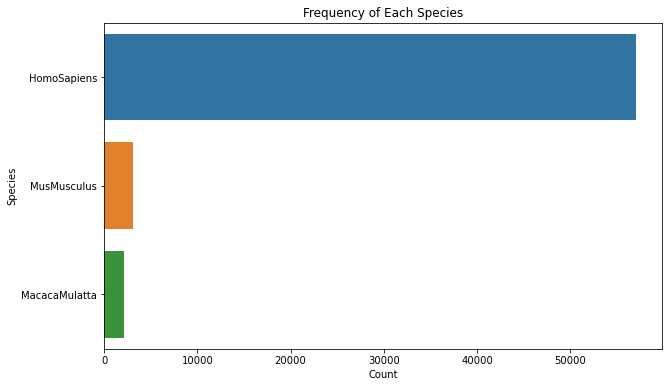

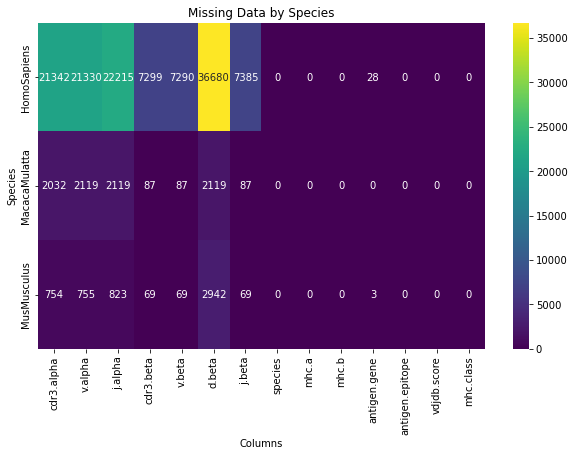

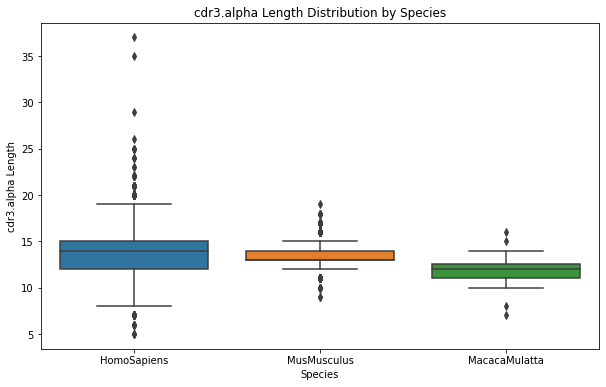

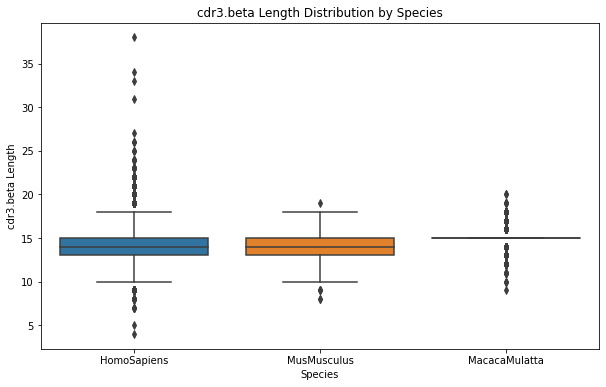

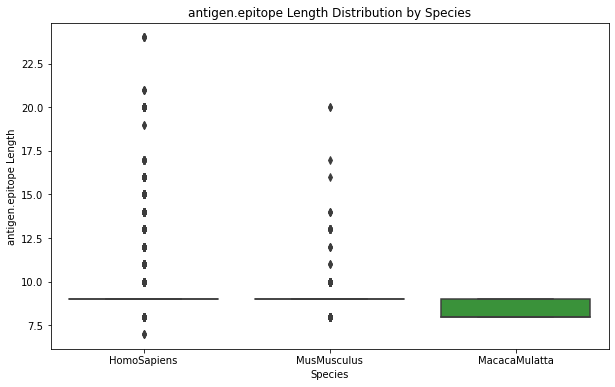

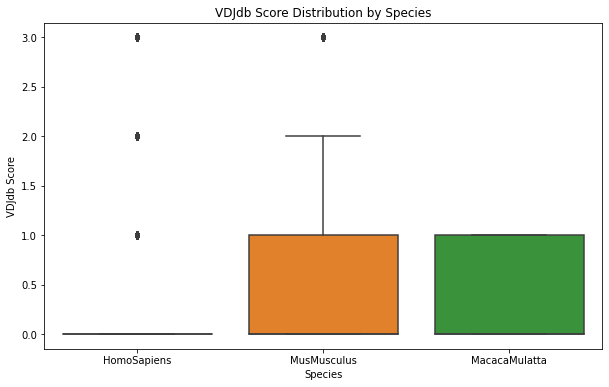

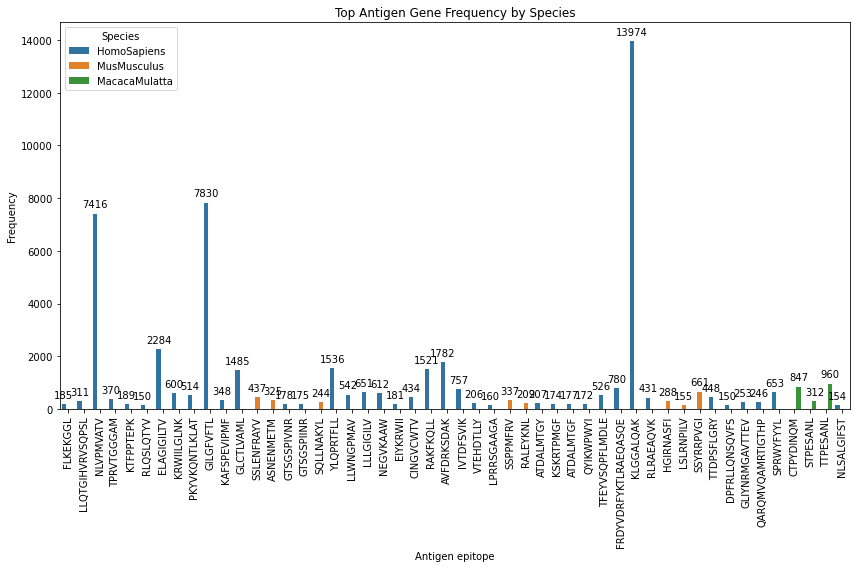

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (the path would need to be updated to your actual file location)
# Here we assume the dataset has been loaded into a dataframe called 'df'
df = filtered_data
# Visualizing the frequency of each species
species_counts = df['species'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=species_counts.values, y=species_counts.index)
plt.title('Frequency of Each Species')
plt.xlabel('Count')
plt.ylabel('Species')
plt.show()

# Group data by species and calculate the sum of missing values for each species
missing_values_by_species = df.groupby('species').apply(lambda x: x.isnull().sum())

# Visualizing missing data by species
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_by_species, annot=True, fmt='d', cmap='viridis')
plt.title('Missing Data by Species')
plt.xlabel('Columns')
plt.ylabel('Species')
plt.show()

# Analyzing the distribution of sequence lengths within each species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y=df['cdr3.alpha'].str.len(), data=df)
plt.title('cdr3.alpha Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('cdr3.alpha Length')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y=df['cdr3.beta'].str.len(), data=df)
plt.title('cdr3.beta Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('cdr3.beta Length')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y=df['antigen.epitope'].str.len(), data=df)
plt.title('antigen.epitope Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('antigen.epitope Length')
plt.show()

# VDJdb score distribution by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='vdjdb.score', data=df)
plt.title('VDJdb Score Distribution by Species')
plt.xlabel('Species')
plt.ylabel('VDJdb Score')
plt.show()



top_n = 50  # Show top 20 categories
top_antigen_genes = df['antigen.epitope'].value_counts().head(top_n).index
df_top_antigens = df[df['antigen.epitope'].isin(top_antigen_genes)]

plt.figure(figsize=(12, 8))  # Increase plot size
ax = sns.countplot(x='antigen.epitope', hue='species', data=df_top_antigens)
plt.title('Top Antigen Gene Frequency by Species')
plt.xlabel('Antigen epitope')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels
plt.legend(title='Species')
plt.tight_layout()  # Adjust layout


# Adding the annotation to each bar
for p in ax.patches:
    height = p.get_height()
    if pd.notnull(height):  # Check if the height is not NaN
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')



after an initial cleaning, we have removed all rows with missing entries for the vital cdr3.alpha and beta columns. Furthermore, there are also now no missing entries for the antigen.epitope column. from prior resaerch the v.alpha and v.beta columns are the next most important, with 2 and 9 missing entries respectively (meaning should we want these columns for supervised learning, further cleaning is required, however only max(11) rows.). J.alpha and beta require significantly more rows to be removed and d.beta has a very substantial number. 

/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_21291/1116036873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '.length'] = df[column_name].apply(len)


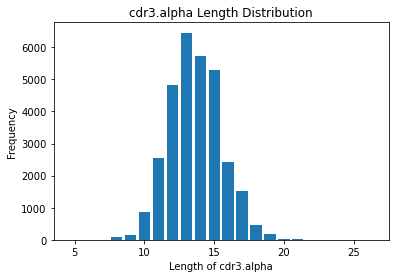

/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_21291/1116036873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '.length'] = df[column_name].apply(len)


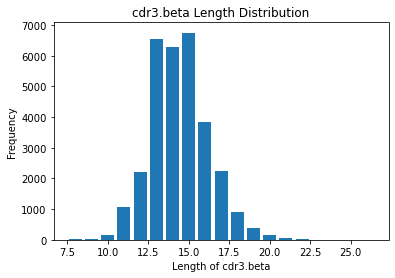

/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_21291/1116036873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '.length'] = df[column_name].apply(len)


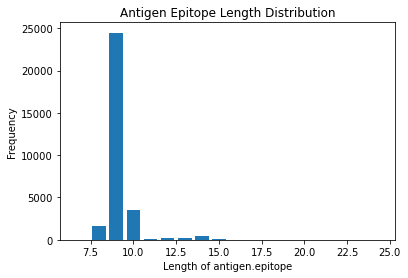

In [9]:
def plot_length_distribution(df, column_name, plot_title):
    """
    Plots a bar chart for the length distribution of the sequences in the specified column.

    Parameters:
    df (DataFrame): The data frame containing the sequences.
    column_name (str): The name of the column to plot.
    plot_title (str): The title of the plot.
    """
    # Calculate the length of sequences
    df[column_name + '.length'] = df[column_name].apply(len)
    
    # Get the value counts of lengths and sort by index (length)
    length_counts = df[column_name + '.length'].value_counts().sort_index()
    
    # Plotting the bar chart
    plt.bar(length_counts.index, length_counts.values)
    plt.title(plot_title)
    plt.xlabel('Length of ' + column_name)
    plt.ylabel('Frequency')
    plt.show()

# Assuming df is your cleaned DataFrame
# Plot the length distributions
plot_length_distribution(df_cleaned, 'cdr3.alpha', 'cdr3.alpha Length Distribution')
plot_length_distribution(df_cleaned, 'cdr3.beta', 'cdr3.beta Length Distribution')
plot_length_distribution(df_cleaned, 'antigen.epitope', 'Antigen Epitope Length Distribution')


The histograms and box plots show the nature of the distribution of the data. 

cdr3.alpha: The data has a relatively narrow interquartile range (IQR), with the median closer to the top of the box, suggesting a skew towards lower values. There are numerous outliers, both above and below the whiskers.

cdr3.beta : This plot has a wider IQR compared to the first, indicating more variability in the data. The median is also closer to the bottom of the box, implying a skew towards higher values. There are many outliers, primarily above the upper whisker.

antigen.epitope: The distribution is very narrow with an even smaller IQR, and the median is at the lower edge of the box. There are outliers, and notably, one outlier is significantly distant from the rest, indicating a very large value compared to the majority of the data.

These give us justification to further remove rows that could be viewed as outliers.



In [2]:
def filter_by_length_range(df, column_name):
    """
    Asks the user for length bounds and filters the DataFrame to include rows where the length of
    the specified column's sequence falls within the provided bounds.

    Parameters:
    df (DataFrame): The data frame to filter.
    column_name (str): The name of the sequence column to check (e.g., 'cdr3.alpha').

    Returns:
    DataFrame: A DataFrame filtered by the specified length range.
    """
    # Ask the user for length bounds
    lower_bound = int(input(f"Enter lower bound for {column_name} length: "))
    upper_bound = int(input(f"Enter upper bound for {column_name} length: "))
    
    # Calculate the sequence lengths
    df[column_name + '.length'] = df[column_name].apply(len)
    
    # Filter based on the length range
    return df[(df[column_name + '.length'] >= lower_bound) & (df[column_name + '.length'] <= upper_bound)]

def filter_by_species(df):
    """
    Asks the user for species to filter by and filters the DataFrame to include rows where the
    species column matches any of the species provided.

    Parameters:
    df (DataFrame): The data frame to filter.

    Returns:
    DataFrame: A DataFrame filtered by the specified species.
    """
    # Ask the user for species to filter by
    input_species = input("Enter the species to filter by (separated by commas): ")
    species_to_filter = [species.strip() for species in input_species.split(',')]
    
    return df[df['species'].isin(species_to_filter)]


def filter_by_minimum_score(df, column='vdjdb.score'):
    """
    Filters the DataFrame based on a minimum score inputted by the user for a specified column.
    
    Parameters:
    df (DataFrame): The data frame to filter.
    column (str): The name of the column to apply the filter on. Defaults to 'vdjdb.score'.
    
    Returns:
    DataFrame: A DataFrame filtered based on the user-specified minimum score.
    """
    # Prompting user for minimum score
    min_score = input(f"Enter the minimum score (inclusive) for {column}: ")
    
    # Validating user input
    try:
        min_score = int(min_score)
        if min_score < 0 or min_score > 3:
            print("Score out of range. Please enter a value between 0 and 3.")
            return df
    except ValueError:
        print("Invalid input. Please enter an integer value.")
        return df
    
    # Filtering the DataFrame
    filtered_df = df[df[column] >= min_score]
    
    return filtered_df

def filter_by_mhc_class(df, column='mhc.class'):
    """
    Filters the DataFrame based on a user-specified MHC class ('MHCI' or 'MHCII').

    Parameters:
    df (DataFrame): The data frame to filter.
    column (str): The name of the column to apply the filter on. Defaults to 'mhc.class'.

    Returns:
    DataFrame: A DataFrame filtered based on the user-specified MHC class.
    """
    # Prompting user for MHC class
    mhc_class = input(f"Enter the MHC class to keep ('MHCI' or 'MHCII'): ").strip()

    # Validating user input
    if mhc_class not in ['MHCI', 'MHCII']:
        print("Invalid input. Please enter 'MHCI' or 'MHCII'.")
        return df
    
    # Filtering the DataFrame
    filtered_df = df[df[column] == mhc_class]
    
    return filtered_df




# Assuming df is your DataFrame
df = df_cleaned
# Apply length range filters
df_filtered_alpha = filter_by_length_range(df, 'cdr3.alpha')
df_filtered_beta = filter_by_length_range(df, 'cdr3.beta')
df_filtered_epitope = filter_by_length_range(df, 'antigen.epitope')
df_filtered_min_score = filter_by_minimum_score(df)
# Intersect the filtered DataFrames to get only rows that meet all criteria
df_length_filtered = df_filtered_alpha.merge(df_filtered_beta).merge(df_filtered_epitope)

# Further filter by species
df_final_filtered = filter_by_species(df_length_filtered)

# df_final_filtered is now your preprocessed DataFrame



/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_30534/1035050068.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '.length'] = df[column_name].apply(len)
/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_30534/1035050068.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '.length'] = df[column_name].apply(len)
/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_30534/1035050068.py:18: SettingWithCopyWarning: 
A value is trying to be set on a

In [3]:
#this is an example of a dataset that can be created from our original data.

df_final_filtered

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,antigen.gene,antigen.epitope,vdjdb.score,mhc.class,cdr3.alpha.length,cdr3.beta.length,antigen.epitope.length
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,Nef,FLKEKGGL,2,MHCI,13,20,8
1,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,Nef,FLKEKGGL,2,MHCI,14,19,8
2,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,Nef,FLKEKGGL,2,MHCI,11,20,8
3,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,Nef,FLKEKGGL,2,MHCI,13,14,8
4,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,Nef,FLKEQGGL,2,MHCI,13,20,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52669,CMDEGGSNYKLTF,TRAV26-1*01,TRAJ53*01,CASSVRSTDTQYF,TRBV7-2*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,Gluten,PQPELPYPQPQL,0,MHCII,13,13,12
52670,CSLYNNNDMRF,TRAV26-1*01,TRAJ43*01,CASSLRYTDTQYF,TRBV7-2*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,Gluten,PQPELPYPQPQL,0,MHCII,11,13,12
52671,CALSTDSWGKLQF,TRAV6*01,TRAJ24*01,CASSPGQGGDNEQFF,TRBV7-3*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,Gluten,PQQPFPQPEQPFP,0,MHCII,13,15,13
52672,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,CASSLGAGGQETQYF,TRBV5-1*01,NaN,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,Gluten,PQQPFPQPEQPFP,2,MHCII,12,15,13
